In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import logging
import gensim
from nltk import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

In [2]:
import numpy as np
import scipy as sp
import scipy.linalg as la
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%matplotlib inline

import re

import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('messages.csv')

In [4]:
df.head()

,date,msg
0,2012-01-02 00:21:00,нужен парень 0965188229
1,2012-01-02 00:24:00,Всем привет! Как настроение?
2,2012-01-02 00:27:00,ИЩЮ ВТОРУЮ ПОЛОВИНКУ МНЕ 23 ЗОВУТ ВАНЯ ПИШИТЕ ...
3,2012-01-02 00:27:00,Эля встречала в шумной компании! Все отлично!
4,2012-01-02 00:27:00,Парень катается по городу. Нужна девушка. 0992...


In [8]:
texts = []
for line in df['msg'].dropna():
    #lowercasing of the sentence, removing of stopwords and tokenizing it
    l = re.sub(r'[^a-zа-я ]', '', line.lower())
    l = re.sub(r'[\n]', '', l).strip()
    if len(l) > 1:
        texts.append(word_tokenize(remove_stopwords(l)))
print(texts[:5])

[['нужен', 'парень'], ['всем', 'привет', 'как', 'настроение'], ['ищю', 'вторую', 'половинку', 'мне', 'зовут', 'ваня', 'пишите', 'прид'], ['эля', 'встречала', 'в', 'шумной', 'компании', 'все', 'отлично'], ['парень', 'катается', 'по', 'городу', 'нужна', 'девушка']]


In [9]:
#creating of the dictionary, where each value is the index number of a word (key)
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary)

Dictionary(217156 unique tokens: ['нужен', 'парень', 'всем', 'как', 'настроение']...)


In [10]:
#creating of the corpus, i.e. transforming words into their index numbers from the dictionary
corpus = [dictionary.doc2bow(text) for text in texts]

In [19]:
#training the model. param 'corpus' takes corpus for training, param 'id2word' takes dictionary for a presentaion of
#words instead of indices in the probabilities, param 'num_topics' takes number of topics for detecting and param  
#'minimum_probability' takes number for controlling of amount of the topics for a document
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, minimum_probability=0.01)

In [16]:
#saving the model
lda.save("chat_model.model")

In [17]:
topics = lda.show_topics(6, 10)
for topic in topics:
    print(topic)

(0, '0.147*"с" + 0.063*"смс" + 0.061*"для" + 0.048*"м" + 0.037*"девушкой" + 0.028*"познакомлюсь" + 0.025*"со" + 0.022*"парень" + 0.022*"дж" + 0.021*"лет"')
(1, '0.043*"я" + 0.042*"девушки" + 0.038*"звоните" + 0.037*"на" + 0.024*"и" + 0.023*"хочу" + 0.023*"к" + 0.022*"девушке" + 0.020*"не" + 0.018*"перезвоню"')
(2, '0.037*"за" + 0.016*"з" + 0.016*"не" + 0.015*"рядом" + 0.015*"задержы" + 0.013*"жинвалид" + 0.012*"группынужен" + 0.011*"девдля" + 0.010*"мл" + 0.010*"пл"')
(3, '0.081*"днепр" + 0.068*"для" + 0.064*"ищу" + 0.040*"ищет" + 0.038*"девушку" + 0.033*"п" + 0.032*"парень" + 0.031*"м" + 0.028*"ж" + 0.017*"дев"')
(4, '0.043*"жен" + 0.030*"муж" + 0.028*"по" + 0.027*"и" + 0.026*"есть" + 0.021*"хочет" + 0.016*"без" + 0.016*"только" + 0.016*"интима" + 0.014*"девушка"')
(5, '0.036*"пар" + 0.026*"сделаю" + 0.024*"в" + 0.019*"и" + 0.016*"админ" + 0.014*"плиз" + 0.014*"все" + 0.013*"женат" + 0.012*"встр" + 0.011*"на"')


0 A little boy named Andy loves to be in his room, playing with his toys, especially his doll named "Woody". But, what do the toys do when Andy is not with them, they come to life. Woody believes that he has life (as a toy) good. However, he must worry about Andy's family moving, and what Woody does not know is about Andy's birthday party. Woody does not realize that Andy's mother gave him an action figure known as Buzz Lightyear, who does not believe that he is a toy, and quickly becomes Andy's new favorite toy. Woody, who is now consumed with jealousy, tries to get rid of Buzz. Then, both Woody and Buzz are now lost. They must find a way to get back to Andy before he moves without them, but they will have to pass through a ruthless toy killer, Sid Phillips.
1 When two kids find and play a magical board game, they release a man trapped for decades in it and a host of dangers that can only be stopped by finishing the game.
2 Things don't seem to change much in Wabasha County: Max and J

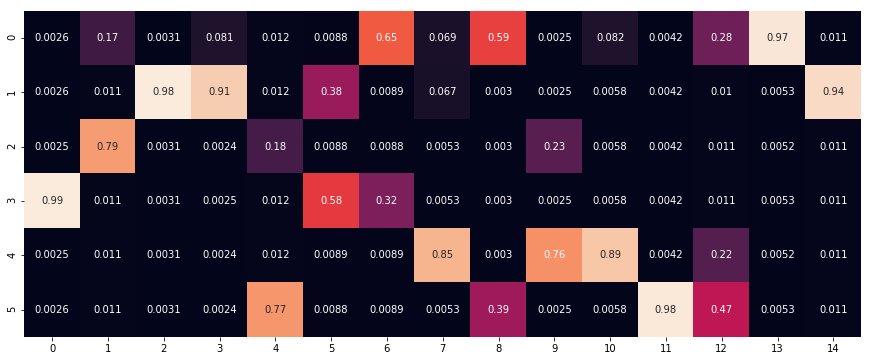

In [44]:
data = []
for i in range(15):
    y = np.zeros(6)
    for topic_proba in lda.get_document_topics(corpus[i]):
        y[topic_proba[0]] = topic_proba[1]
    data.append(y)
    print(i, df['plot'][i])
data_np = np.array(data)
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.heatmap(data_np.T, xticklabels=1, yticklabels=1, annot=True, cbar=False)

In [45]:
# counitng probabilities for a new doc
new_doc = "The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe. "
l = re.sub(r'[^a-z ]', '', new_doc.lower())
l = re.sub(r'[\n]', '', l).strip()
new_line = dictionary.doc2bow(word_tokenize(remove_stopwords(l)))

y = np.zeros(6)
for topic_proba in lda.get_document_topics(new_line):
    y[topic_proba[0]] = topic_proba[1]
data.append(y)

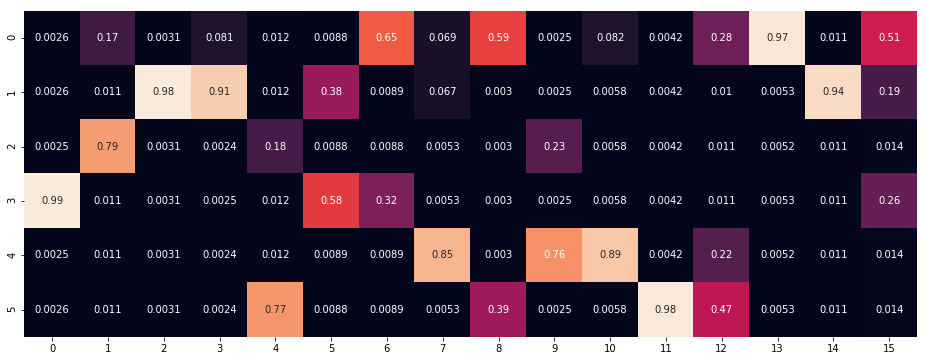

In [48]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.heatmap(np.array(data).T, xticklabels=1, yticklabels=1, annot=True, cbar=False)

In [50]:
#loading model
model = gensim.models.LdaModel.load("movies_model.model")

In [105]:
#place for your sentences (now use model[] for predictions)